In [1]:
import json
import pandas as pd
import seaborn as sns
import pprint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FRIGATE_DATA_PATH = "/home/alberto/Dropbox/alberto/projects/frigate/frigate/data"
DAGS = ["frigate-dag-scale1", 
        "frigate-dag-scale2", 
        "frigate-dag-scale4", 
        "frigate-dag-scale8"]
STATSD_METRICS = ["stats.frigate-simulator.steps-done", 
                  "stats.frigate-simulator.sent-vehicle-statuses",
                  "stats.frigate-simulator.re-routings"]

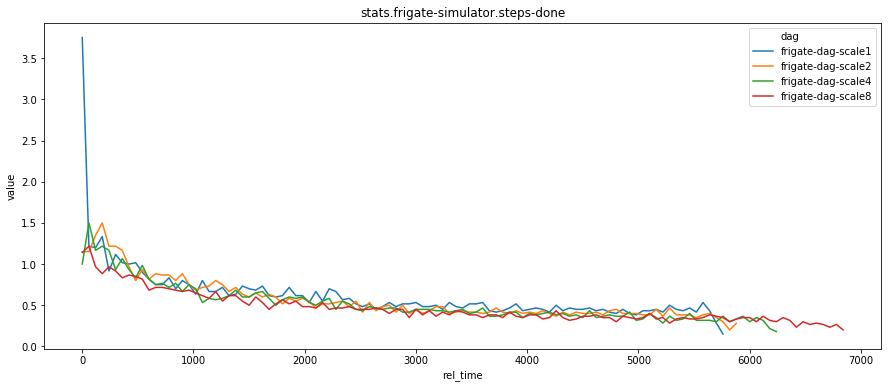

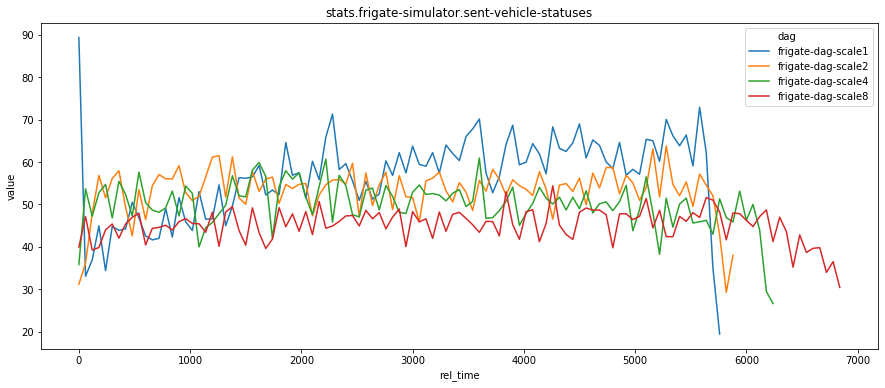

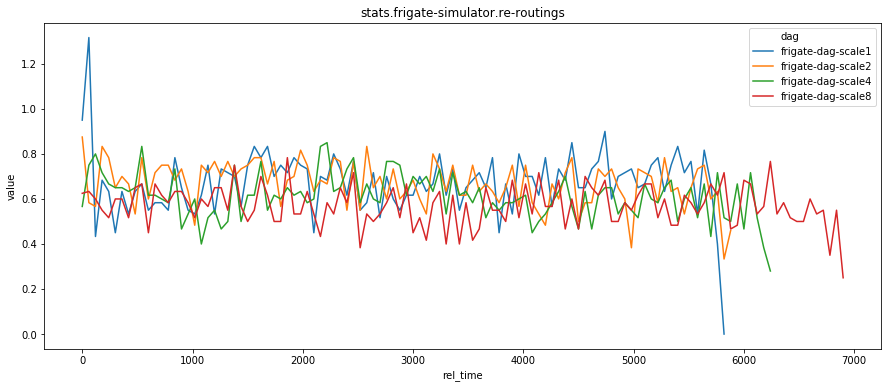

In [3]:
for statsd_metric in STATSD_METRICS:
    
    all_dags_df = pd.DataFrame()
    for dag in DAGS:    
        metric_file = f"{FRIGATE_DATA_PATH}/{dag}/monitor/{statsd_metric}.json"
        dag_data = json.load(open(metric_file, "r+"))

        dag_data_df = pd.DataFrame.from_records(dag_data[0]["datapoints"], columns=["value", "time"])    

        # compute rel_time column with the relative time (in seconds) since the start of the simulation
        dag_data_df = dag_data_df[ dag_data_df["value"].notnull() ]    
        start_time = dag_data_df.iloc[0]["time"]
        dag_data_df["rel_time"] = dag_data_df["time"] - start_time

        dag_data_df["dag"] = dag    
        all_dags_df = all_dags_df.append(dag_data_df)    

    # plot metric
    plt.figure(figsize=(15,6))
    plt.title(statsd_metric)
    ax = sns.lineplot(x="rel_time", y="value", hue="dag",
                      data=all_dags_df)